Numpy y Pandas
====================

Qué es numpy
-------------------

El nombre vienen de _Numerical Python_. Es una librería de software libre que permite a Python trabajar con vectores y matrices de forma muy oficiente. Entro otras cosas, el almacenamiento y el acceso es muy rápido, y permite operaciones vectorizadas, acceso por nomemclarura de slices y selección mediante vectores booleanos.

Este optimización se consigue porque los array solo adminten un determinado tipo de datos, no son tan versátiles como las listas o conjuntos de Python, que aceptan cualquier clase de elemento. Además, el tipo de dato esta definido muy rigurosamente. Podemos definir el tipo cuando creamos el array o dejar que numpy lo infiera a partir de los datos que le damos. Si son todo enteros, por ejemplo, seguramante creará un array de _enteros de 64 bits_.

Podemos crear un array a partir de cualquier secuencia homogenea de valores Pytho usando la función `array`. Es muy habitual usar una lista:

In [184]:
import numpy as np

a = np.array([1, 2, 3, 4])
print(a)

[1 2 3 4]


In [185]:
a = np.array(range(1, 5))
print(a)

[1 2 3 4]


Podemos crear una matriz usando una lista de listas:

In [186]:
b = np.array([
    [1, 1.1, 1.2, 1.3],
    [2, 2.1, 2.2, 2.3],
    [3, 3.1, 3.2, 3.3],
])
print(b)

[[ 1.   1.1  1.2  1.3]
 [ 2.   2.1  2.2  2.3]
 [ 3.   3.1  3.2  3.3]]


Los arrays tienen un atributo que define su tipo, `dtype` y otro que define su forma: `shape`:

In [187]:
b.shape

(3, 4)

In [188]:
b.dtype

dtype('float64')

Podemos usar el método `reshape` para cambiar las dimensiones de una array; esto puede ser útil para crear arrays grandes a partir de una secuencia lineal:

In [189]:
b = np.array(range(16)).reshape((4, 4))
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

> **Nota** : Obsérvese que el parámetro que se le pasa a `reshape` es una tupla.

Una forma muy eficiente de crear matrices es la función `zeros` para crear vectores o matrices con todos los valores a cero:

In [190]:
z = np.zeros((4,4))
z

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

La función `eye` permite crear una matrix cuadrada con la diagonal a 1 y el resto de valores a 0. Solo hay que pasarle un dato, ya que al ser ciadrada el número de columnas es igual el de filas.

In [191]:
i = np.eye(4)
print(i)

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


También tenemos la función `arange`, que funciona como el range normal, pero vectorizado (Veremos quu significa esto más adelante):

In [192]:
np.arange(36)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [193]:
np.arange(1, 11, 2)

array([1, 3, 5, 7, 9])

In [194]:
np.arange(36).reshape((6,6))

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

La función `linspace` es similar a range, pero en vez de aceptar como tercer parámetro un paso, se le indica el número de valores que queremos en ese intervalo, y el último valor indicado tamnbién está dentro del rango:

In [195]:
np.linspace(2, 9, 20)

array([ 2.        ,  2.36842105,  2.73684211,  3.10526316,  3.47368421,
        3.84210526,  4.21052632,  4.57894737,  4.94736842,  5.31578947,
        5.68421053,  6.05263158,  6.42105263,  6.78947368,  7.15789474,
        7.52631579,  7.89473684,  8.26315789,  8.63157895,  9.        ])

### Algunas ventajas de los arrays de numpy

#### Operaciones vectorizadas

Una operación vectoriada es una una técnica que consiste en aplicar una misma operación a un array (o a parte de un array) sin necesidad de especificar bucles. Como este se implementean en  C y tiene acceso inmediato a los datos el rendimiento se eleva en varios ordenes de magnitud. Además, el código resultante es más corto y se entiende mejor.

Por ejemplo, vamos a calcular lo que lleva calcular el cubo de una serie de números, haciendlo nativamente en Python o usando Nunpy:

In [196]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [197]:
n1 = (random.random() for i in range(10000000))
c1 = []
%time for x in n1: c1.append(x**3)

CPU times: user 3.46 s, sys: 76 ms, total: 3.54 s
Wall time: 3.53 s


Usando numpy, podemos usar `numpy.random.rand` para crear el array, y luego simplemente lo elevamos al cubo:

In [198]:
n2 = np.random.rand(10000000)
%time c2 = n2 ** 3

CPU times: user 572 ms, sys: 28 ms, total: 600 ms
Wall time: 602 ms


In [199]:
assert len(c1) == len(c2)

En resumen: Siempre que puedas, usa operaciones vectorizables. Si estás trabajando con arrays de numpy y estas haciendo un for en algún lado, estás haciendo algo mal.

#### Selección booleana

Podemos hacer un filtrado de filas dentro de un array de numpy usando un venctor de booleanos; las filas en las que haya un verdadero en el la posicción del vector booleano equivalente pasan el filtro. En caso contrario no. Mejor vamoslo con un ejemplo:

Podemos crear un array de numpy a partir de la función `array`, pasándole cualquier secuencia. Es muy habitual usar una lista:

In [200]:
a = np.array([1,2,3,4])
print(a)

[1 2 3 4]


Podemos crear una matriz usando una lista de listas:

In [201]:
b = np.array([
    [1, 1.1, 1.2, 1.3],
    [2, 2.1, 2.2, 2.3],
    [3, 3.1, 3.2, 3.3],
])
print(b)

[[ 1.   1.1  1.2  1.3]
 [ 2.   2.1  2.2  2.3]
 [ 3.   3.1  3.2  3.3]]


Si queremos quedarnos solo con la primera y tercera columnas, podemos filtrar usando un vector de booleanos:

In [202]:
f = np.array([True, False, True])
print(b[f])

[[ 1.   1.1  1.2  1.3]
 [ 3.   3.1  3.2  3.3]]


Lo que es interensate es que podemos obtener este tipo de vectores haciendo comparaciones entre arrays. Por ejemplo, supongamos que tennemos el siguiente array:

In [203]:
l = np.array([-23, 144, 85, 36, -2, 0, 7, 92])

Podemos hacer la siguiente comparación: `f < 0`. En principio esta comparación no tiene ninguna lógica; estamos comparando un array de valores con un solo número. Con listas nativas de Python es verdad que no tienen sentido, pero las clases que implementan los array usan una técnica de OOP llamada **sobrecarga de operadores**, es decir, que redefinen el comportamiento y los resultados cuando se opera con los arrays. En este caso, al comparar con un valor escalar, aplica esa comparación de forma vectorizada a todos los valores del array, y devuelve un array con los resultados:

In [204]:
l < 0

array([ True, False, False, False,  True, False, False, False], dtype=bool)

Usando  este vector de booleanos como filtro, puedo obtener un array que es un sobconjunto de las filas de l, en el que las filas solo tienen valores positivos:

In [205]:
print('Menores que 0:', l[l<0])
print('Mayores que 0:', l[l > 0])
print('Igual que 0:', l[l == 0])

Menores que 0: [-23  -2]
Mayores que 0: [144  85  36   7  92]
Igual que 0: [0]


#### Slices

Los arrays de numpy también se puede operar com slices, como las listas o las cadenas de texto.

Los elementos de una matriz bidimensional se pueden acceder de
dos maneras:

- usando `[fila][columna]` 
- usando `[fila, columna]`

In [206]:
m = np.arange(1, 17).reshape((4, 4))
assert list(m[1]) == [5, 6, 7, 8]
assert m[1][3] == m[1,3] == 8
m

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

Qué es Pandas
-------------------------

Pandas se construye encima de NumPy y de Matplotlib, 

LOs objetos más importantes de Pnadas son las **Series** y los **DataFrames**.

### Series

El bloque primario sobre el que se construye Pandas son los objetos de tipo **Series**.
Una serie representa una lista o array unidimensional --basado en los arrays de numpy--, etiquetado e indexado. Al igual que un array, una serie puede contener cero o más valores de un unico y predeterminado tipo de datos.

Una serie se diferencia de un array de NumPy porque se le han añadido una serie de etiquetas que se usan para indexar y acceder de forma eficiente a los elementos del array, permitiendo acceder de otras formas además de por la posición . Esta capacidad es clave para Pandas y añado una potencialidad adicional en la forma de acceder a los elementos contenidos en la serie.

![Vector versus Pandas Series](../img/array-vs-pandas-series.svg "NumPy Array versus Pandas Series")

LAs series siempre tendrán un índice, aunque no se haya especificado. Si fuera ese el caso, Pandas creará un índice que consistira en una secuencia de enteros empezando por el cero, lo que coincidiría con el índice natural. Este comportamiento hace que el la serie se parezca un array, y es un comportamietno desable, ya que permite que, en la mayor parte de los casos, donde se este usando un array podemos cambiarlo por una serie de Pandas.

Peo aunque el acceso sea parecido, el acceso por el indice de Pandas no es por posición, sino por el valor de la etiqueta. Las etiquetas no tienen que ser consecutivas, ni números, se pueden repetir, pueden estar formadas por varios valores (jerarquía de etiquetas), y son usadaas siempre por Pandas para el acceso a los elementos.

Una característica importante y muy apreciada de pandas es el alineamiento automático que se consigue con estas etiquetas. Las operaciones aplicaddas  sobre varias series --por ejemplo, una suma-- no se realizan a ciegas alineando los elementos por su posición, sino que loas filas se alinean por las etiquetas del índice y seaplica la operación a aquellos elementos con el mismo valor de etiqueta o índice. En cierta manera la serie se comporta como si fuera un diccionario donde la etiqueta en el valor clave.

Vasmos todo esto con un ejemplo. Podemos crear series de Pandas a partir de cualquier secuencia:

In [207]:
# Una serie con etiqeutas que coinciden con el índice natural

s = pd.Series(['Star Wars', 'Star Trek', 'Galactica'])
assert s[0] == 'Star Wars'
s

0    Star Wars
1    Star Trek
2    Galactica
dtype: object

Podemos especificar las etiquetas a usar, si queremos:

In [208]:
# Podemos indicar que índices o etiquetas se deben usar

s = pd.Series(
    ['Star Wars', 'Star Trek', 'Galactica'],
    index=['sw', 'st', 'g']
)
assert s['sw'] == 'Star Wars'
s

sw    Star Wars
st    Star Trek
g     Galactica
dtype: object

Veamos como funciona lo de del alineado automático:

In [209]:
# No suma a lo loco, solo en aquellos casos en que se correspondadn las etiquetas

s1 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([2, 3, 4, 5], index=['b', 'c', 'd', 'e'])
s1 + s2

a     NaN
b    22.0
c    33.0
d    44.0
e     NaN
dtype: float64

> El valor especial `NaN` significa _Not a Number_ y en la práctica significa _No sé lo que es, pero no es un número_. Cuando operamos con `NaN` todo se vuelve muy sencillo (A la par que inutil). Por ejemplo, la suma de cualquier numero con `NaN` es `NaN`. Como la serie `s2` no tiene valor para la etiqueta `a`, se asume `NaN`. Ahora sumanos ese valor con `s1`, que si tiene un valor etiqeutado `a`, pero como la suma de `NaN` con cualquier número es `NaN`, eso es lo que obtenemos. Igual pasa con el valor etiquetado con `e`, solo que en este caso si esta enla segunda serie pero no en la primera.

Una serie también se puede crear a partir de un diccionario; las claves del diccionario seran las etiquetas de la Serie. Otra cosa característica de la serie es que puede tener un nombre.

In [210]:
s = pd.Series(
    {'sw': 'Star Wars', 'st': 'Star Trek', 'bg': 'Battleship Galactica'},
    name='scifi'
)
assert s.name == 'scifi'
s

bg    Battleship Galactica
st               Star Trek
sw               Star Wars
Name: scifi, dtype: object

Como hemos visto, el acceso a un elemento se hace mediante la etiqueta, pero tambien podemos acceder por posición usando el método `iloc`:

In [211]:
s.iloc[:]

bg    Battleship Galactica
st               Star Trek
sw               Star Wars
Name: scifi, dtype: object

La serie ordena internamente las etiquetas, así que este caso, lo primera posición es para `bg`.

Podemos obtener los contenidos de la secuencia en forma de
array de NumPY con la propiedad `values`:

In [212]:
s = pd.Series(
    {'sw': 'Star Wars', 'st': 'Star Trek', 'bg': 'Battleship Galactica'},
)
l = s.values
type(l), l

(numpy.ndarray,
 array(['Battleship Galactica', 'Star Trek', 'Star Wars'], dtype=object))

E igualmente podemos obtener un los valores del índice 
con la propiedad `index`:

In [213]:
s = pd.Series(
    {'sw': 'Star Wars', 'st': 'Star Trek', 'bg': 'Battleship Galactica'},
)
l = s.index
type(l), l

(pandas.core.indexes.base.Index, Index(['bg', 'st', 'sw'], dtype='object'))

Esto nos puede ser útil para crear un array con las mismas etiquetas a partir de uno ya existente:

In [214]:
l = pd.Series(range(7), index='a b c d e f g'.split())
l2 = pd.Series(2, index=l.index)
assert len(l2) == 7
assert l['a'] == 0
assert l2['a'] == 2
l2.head()

a    2
b    2
c    2
d    2
e    2
dtype: int64

Podemos crear tambien una serie de Pandas a partir de un array de NumPy:

In [215]:
array = np.random.randn(200)
s = pd.Series(array, name='noise')
s.head()

0   -0.727460
1    0.236922
2   -1.330556
3   -0.925924
4   -1.335755
Name: noise, dtype: float64

Un método muy cómodo para ver los datos de una serie es `head()`, que nos muestra como máximo los 5 primeros elementos de la misma. Otra característca interesante esel atributo `shape`, que no s devolvera una tupla; el primer elemento de la tupla es el número de filas. O tambien podemos usar la función `len` sobre la serie:

In [216]:
s = pd.Series(np.linspace(-10, 10, 30))
s.shape == len(s)
s.shape

(30,)

Para más precisión, podemos usar `count`, que devolverá el número de elementos que no sean `NaN`, o `unique()`, que devolverá el número valores unicos de elementos en la serie. Si necesitamos, además de los valores únicos, es recuento total de cada valor, podemos usar `value_counts()`.

In [217]:
s = pd.Series([2, 5, 5, 7, 2, 8, 1, 1, 1, 2, 3, 7, None])
print('Tamaño:', len(s))
print('Nº de elementos:', s.count())
print('Valores únicos:', s.unique())
print('Valores únicos y acumulado:', s.value_counts())

Tamaño: 13
Nº de elementos: 12
Valores únicos: [  2.   5.   7.   8.   1.   3.  nan]
Valores únicos y acumulado: 1.0    3
2.0    3
7.0    2
5.0    2
3.0    1
8.0    1
dtype: int64


### Dataframes

Un DataFrames es un montón de series, todas las cuales comparten el mismo índice. Cada columna en una serie por si misma. Se puede pensar en ellos como en una hoja Excel. Pero mejor. Una de las cosas interesantes es que mantiene la alineación automática, asi como las operaciones paralelas al estilo de NumPy.

Podemos crear un pandas de muchas formas, a partir de listas y diccionarios, con arrays de NumPy, etc... Una forma muy habital es, por ejemplo, a partir de un fichero .CSV:

In [218]:
import pandas as pd

titanic = pd.read_csv('../data/titanic.csv')

Podemos hacernos una idea del contenido de DataFrame, tal y cono los ha interpretado, usando el metodo `head`, que vimos anteriormente en la sección de las Series. Unsado el nombre de cada una de las series que componen el dataframe, podemos usarla como si fuera una serie independiente:

In [219]:
titanic.name[0]

'Allen, Miss. Elisabeth Walton'

Si queremos accedera varios valores, podemos acceder por un array de indices o con un array de booleanos:

In [220]:
titanic.name[[1,2,3,4,5]]

1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                Anderson, Mr. Harry
Name: name, dtype: object

La primera columna es el índice o etiquetas. Podemos elegir las filas que que se muestran haciendo una selección antes igual que con una serie. Vamos a buscar a ver si encontramos al personaje que interpreta DiCaprio en la película:

In [221]:
q1 = titanic[['name', 'sex', 'age']]
q1[(titanic.sex == 'male') & (titanic.age == '23')]

,name,sex,age
140,"Greenfield, Mr. William Bertram",male,23
225,"Payne, Mr. Vivian Ponsonby",male,23
332,"Baimbrigge, Mr. Charles Robert",male,23
345,"Berriman, Mr. William John",male,23
403,"Eitemiller, Mr. George Floyd",male,23
447,"Hocking, Mr. Richard George",male,23
525,"Pain, Dr. Alfred",male,23
547,"Richard, Mr. Emile",male,23
571,"Troupiansky, Mr. Moses Aaron",male,23
579,"Ware, Mr. William Jeffery",male,23


No aparece ningún Jack Dawson. A ver si va a ser mentira...

Con el método `describe` podemos obtener un poco más de información acerca de los datos, incluyendo medias, desviaciones estandar, máximos, mínimos, quartiles 

In [222]:
titanic.describe()

,pclass,survived,sibsp,parch,body
count,1309.000000,1309.000000,1309.000000,1309.000000,121.000000
mean,2.294882,0.381971,0.498854,0.385027,160.809917
std,0.837836,0.486055,1.041658,0.865560,97.696922
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,72.000000
50%,3.000000,0.000000,0.000000,0.000000,155.000000
75%,3.000000,1.000000,1.000000,0.000000,256.000000
max,3.000000,1.000000,8.000000,9.000000,328.000000


Al igual que un array de numpy, podemos obtener las columnas (Proyectar, en jerga informática) usando los vectores booleanos que son el resultado de operaciones vectorizables, pero con la comodidad de acceder no solo por posición sino por nombre:

In [223]:
males = titanic[titanic['sex']=='male']
females = titanic[titanic['sex']=='female']
print('Nº de varones:', len(males))
print('Nº de mujeres:', len(females))

Nº de varones: 843
Nº de mujeres: 466


podemos representar una gráfica de edades con el método `plot`, que ya está incluido por defecto en las Series y en los Dataframes:

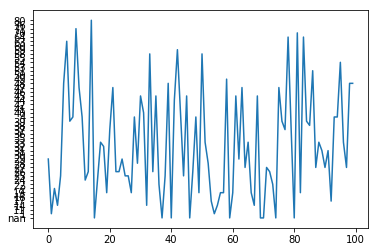

In [224]:
ages = titanic.age[0:100]
plt.plot(range(len(ages)), ages)

O usar otras posibilidades, como el método `hist` incluido en el DataFrame, para representar un histograma de una serie de valores:

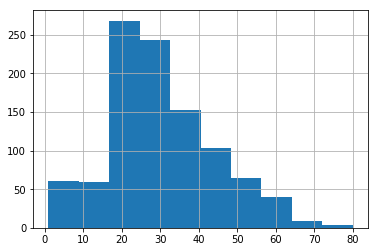

In [225]:
pd.to_numeric(titanic.age, errors='coerce').hist(bins=10);

Atención a la llamada a `to_numeric`, el dato en la columnda está como texto.

Con respecto al uso de `NaN`, Pandas lo gestiona de forma diferente a NumPy. En NumPY, los cálculos producen un error en cuanto aparece un `NaN`, mientras que Pandas, en general, tiene a obviarlo.

In [ ]:
nda = np.array([1, 2, 3, 4, 5])
assert nda.mean() == 3.0
nda = np.array([1, 2, 3, 4, np.NaN])
nda.mean() == np.NaN
s = pd.Series(nda)
s.mean() == 2.5



Es este caso, Pandas ignora totalmante el valor `NaN`. este valor es habitual para aquellos casos. Es el comportamiento habitual con herramientas estadísiticas, en las que se espera datos incompletos, que iremos refinando poco a poco. En caso de ser necesario, las librerias de Panda incorporan un parámetro que los fuerza a trabajar al modo de NunPY.
